In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import Squeezing_helper as SqH
import scipy.constants as constants 

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

n = 3/2
(Ix, Iy, Iz) = spin_J_set(n)
Ix2 = Ix**2
Iy2 = Iy**2
Iz2 = Iz**2
Im = Ix - 1j*Iy
Ip = Ix + 1j*Iy
I2 = Ix**2+Iy**2


import warnings
warnings.filterwarnings('ignore')

In [2]:
def defH1(eta, split):    
    Hamil = split/(4*n*(2*n-1))*(3*Iz2 - qeye(4)*n*(n+1))
    #omegaQ is (uni)axail anisotropy?
    
    Hamil += split/(4*n*(2*n-1))*eta*(Ix2 - Iy2)/2
    #omegaT transverse anisotropy
    #eta = omegaT/omegaQ, let's keep omegaQ constant
    return Hamil

In [3]:
def intialThermal(hamiltonian, temperature):
    '''
    In the high field limit \rho_eq = Iz. Temperature only important if we care about absolute numbers.
    
    In the rotating frame, B1 is static. So apply rotation operator exp(-i pi/2 Iy)
    '''
    
    exponent = - ((constants.Planck/constants.Boltzmann) * hamiltonian ) / temperature
    numerator = exponent.expm()
#     dm_rot = numerator
    dm_rot =((-1j*np.pi*Iy/2).expm())*(numerator)*((-1j*np.pi*Iy/2).expm()).dag()
    
    return dm_rot.unit()

In [10]:
omegaQ = 1e2*4*np.pi
eta = 0

H = defH1(eta, omegaQ)+10e3*2*np.pi*Iz
T2 = 1e-1

rho_0 = intialThermal(H, 5e-5)

In [11]:
fr, ft = SqH.calcSPLIT(H, rho_0, None, acquisition_time = 3e-1, T2 = T2, n_points=100000)

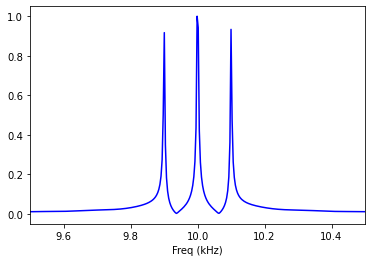

In [12]:
plt.figure()
plt.plot(fr*1e-3, ft/np.max(ft), 'b');
plt.xlabel("Freq (kHz)")
plt.xlim([9.5,10.5]);